In [1]:
import pandas as pd
from matplotlib import pyplot as plt

#turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
suicide_rates_df = pd.read_csv('master.csv')
suicide_rates_df = suicide_rates_df.drop(['country-year', ' gdp_for_year ($) ', 'generation'], axis=1)
suicide_rates_df = suicide_rates_df[suicide_rates_df['year'] == 2020]
suicide_rates_df = suicide_rates_df.dropna()
suicide_rates_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
27823,Australia,2020,male,5-14 years,15.0,25655289,0.058467,0.960859,51692.842750
27824,Austria,2020,male,5-14 years,2.0,8916864,0.022429,0.921971,48586.801320
27834,Costa Rica,2020,male,5-14 years,1.0,5123105,0.019519,0.817895,12140.854150
27838,Czechia,2020,male,5-14 years,3.0,10697858,0.028043,0.896591,22931.274600
27841,Ecuador,2020,male,5-14 years,44.0,17588595,0.250162,0.737612,5600.389615
...,...,...,...,...,...,...,...,...,...
31493,Serbia,2020,female,75+ years,62.0,6899126,0.898665,0.796845,7720.510572
31495,Singapore,2020,female,75+ years,18.0,5685807,0.316578,0.931806,59797.752180
31497,Slovenia,2020,female,75+ years,24.0,2102419,1.141542,0.908508,25517.330670
31499,Spain,2020,female,75+ years,182.0,47365655,0.384245,0.889149,27063.193920


In [3]:
# separate male and female suicide rates
male_suicide_rates_df = suicide_rates_df[suicide_rates_df['sex'] == 'male']
female_suicide_rates_df = suicide_rates_df[suicide_rates_df['sex'] == 'female']


In [4]:
# calculate suicide rates per 100k people
male_suicide_rates_df['suicide_rate_per_100k'] = male_suicide_rates_df['suicides_no'] / male_suicide_rates_df['population'] * 100000
female_suicide_rates_df['suicide_rate_per_100k'] = female_suicide_rates_df['suicides_no'] / female_suicide_rates_df['population'] * 100000

In [5]:
# sort by suicide rate
male_suicide_rates_df = male_suicide_rates_df.sort_values(by='suicide_rate_per_100k', ascending=False)
female_suicide_rates_df = female_suicide_rates_df.sort_values(by='suicide_rate_per_100k', ascending=False)

In [6]:
# get a list of the countries
countries = male_suicide_rates_df['country'].tolist()

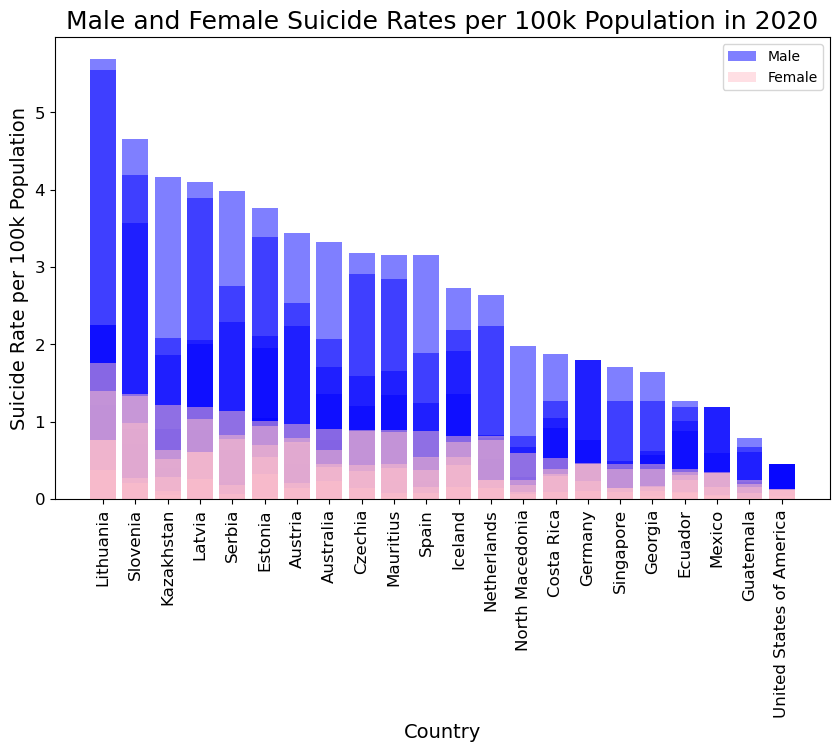

In [10]:
# create a bar graph for male and female suicide rates
plt.figure(figsize=(10, 6))
plt.bar(countries, male_suicide_rates_df['suicide_rate_per_100k'], alpha=0.5, label='Male', color='blue')
plt.bar(countries, female_suicide_rates_df['suicide_rate_per_100k'], alpha=0.5, label='Female', color='pink')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Suicide Rate per 100k Population', fontsize=14)
plt.title('Male and Female Suicide Rates per 100k Population in 2020', fontsize=18)
plt.legend()
plt.show()

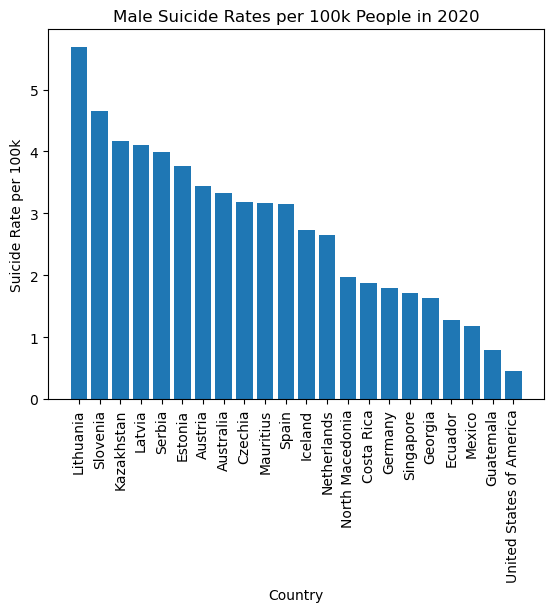

In [15]:
# create bar chart for male suicide rates
plt.bar(male_suicide_rates_df['country'], male_suicide_rates_df['suicide_rate_per_100k'])
plt.xticks(rotation=90)
plt.title('Male Suicide Rates per 100k People in 2020')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.show()

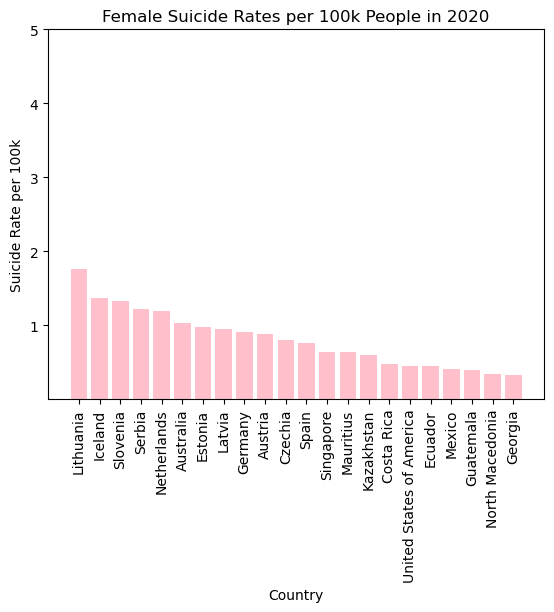

In [32]:
# create bar chart for female suicide rates
plt.bar(female_suicide_rates_df['country'], female_suicide_rates_df['suicide_rate_per_100k'],color='pink')
plt.xticks(rotation=90)
plt.title('Female Suicide Rates per 100k People in 2020')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.yticks(range(1,6))
plt.show()


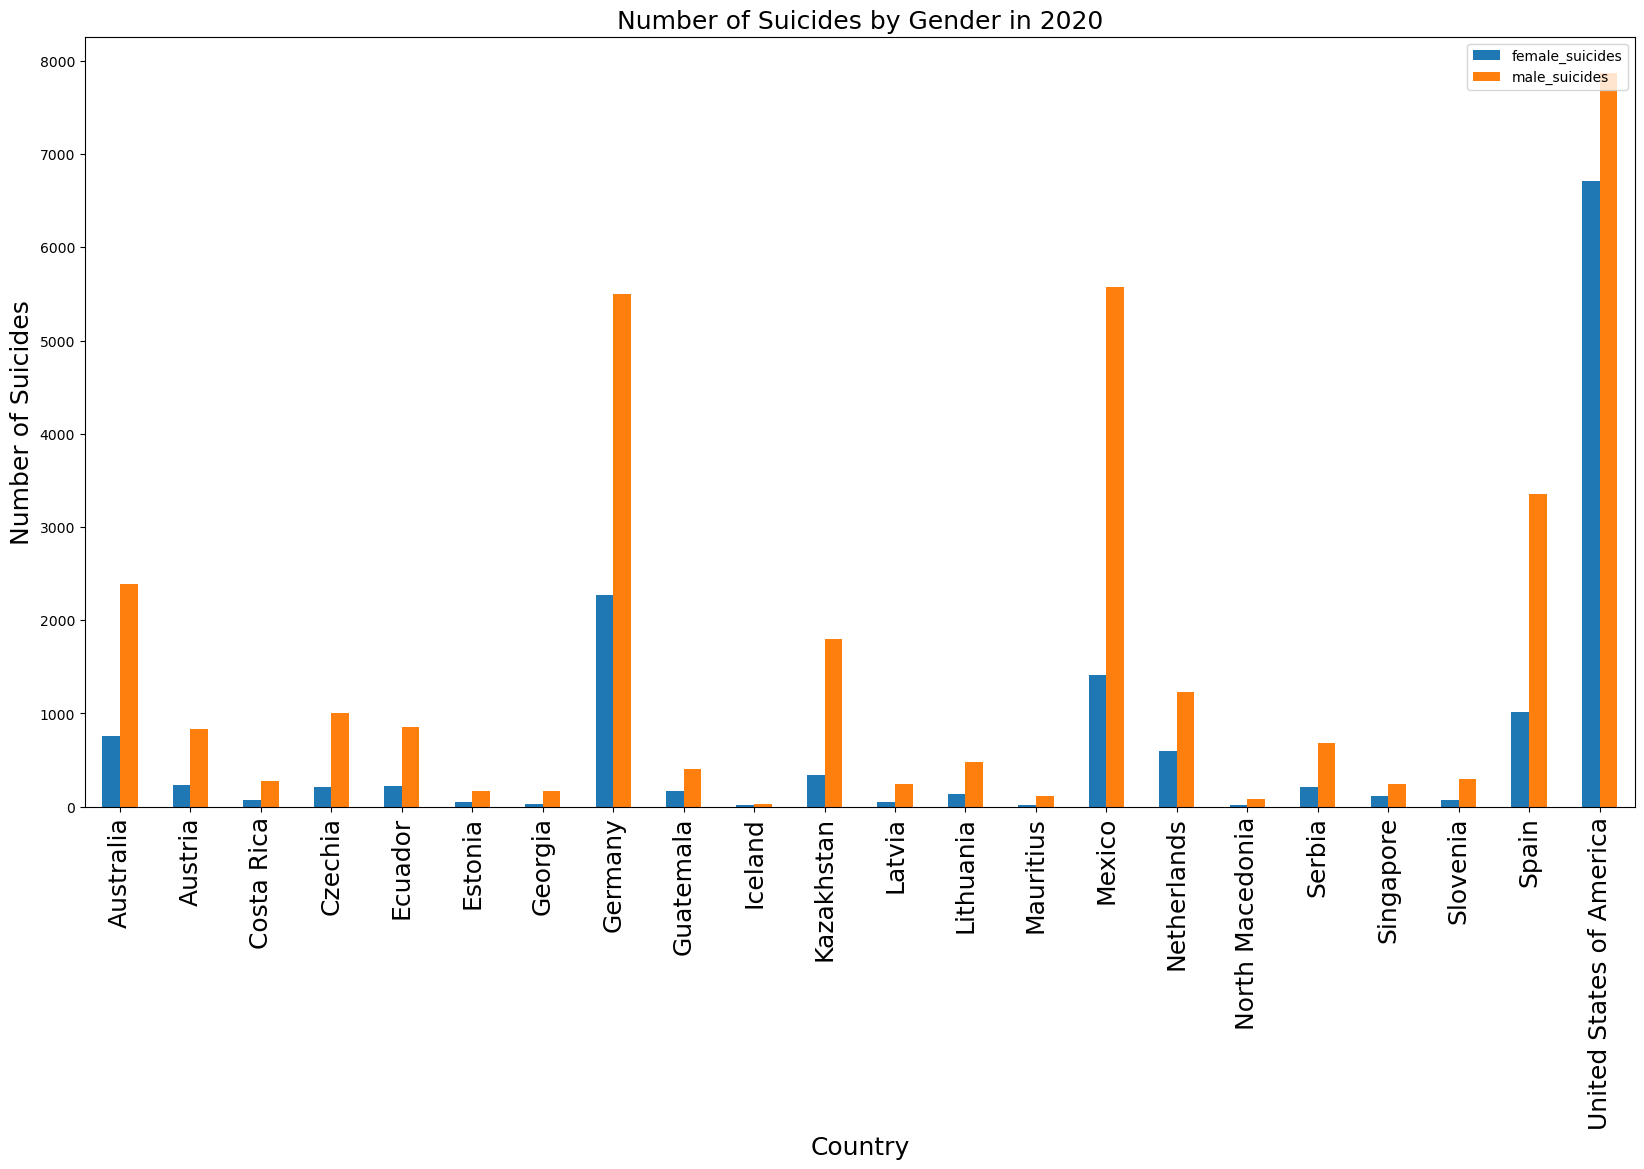

In [27]:
# Group data by country and gender
grouped_data = suicide_rates_df.groupby(['country', 'sex']).sum()
grouped_data = pd.DataFrame(grouped_data['suicides_no'])
grouped_data = grouped_data.reset_index()

# Pivot data to create separate columns for male and female suicide rates
pivoted_data = grouped_data.pivot(index='country', columns='sex', values='suicides_no')
pivoted_data.columns = ['female_suicides', 'male_suicides']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))
pivoted_data.plot(kind='bar', ax=ax)
plt.xticks(rotation=90, fontsize=18)
plt.xlabel('Country',fontsize=18)
plt.ylabel('Number of Suicides',fontsize=18)
plt.title('Number of Suicides by Gender in 2020',fontsize=18)
plt.legend(loc='upper right')
plt.show()

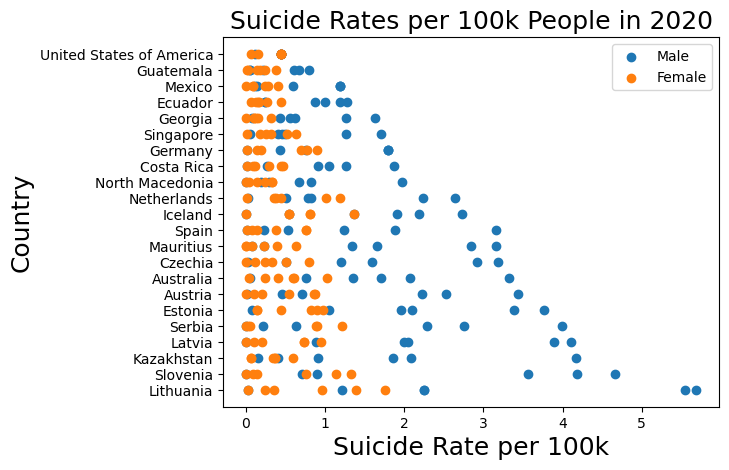

In [16]:
# create scatter plot for male and female suicide rates
plt.scatter(male_suicide_rates_df['suicide_rate_per_100k'], male_suicide_rates_df['country'], label='Male')
plt.scatter(female_suicide_rates_df['suicide_rate_per_100k'], female_suicide_rates_df['country'], label='Female')
plt.legend()
plt.title('Suicide Rates per 100k People in 2020',fontsize=18)
plt.xlabel('Suicide Rate per 100k',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.show()

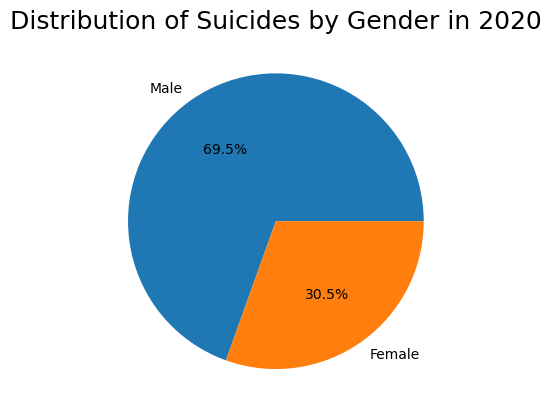

In [22]:
# create pie chart for male and female suicide rates
labels = ['Male', 'Female']
male_total_suicides = male_suicide_rates_df['suicides_no'].sum()
female_total_suicides = female_suicide_rates_df['suicides_no'].sum()
sizes = [male_total_suicides, female_total_suicides]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Suicides by Gender in 2020',fontsize=18)
plt.show()